(427, 640, 3)


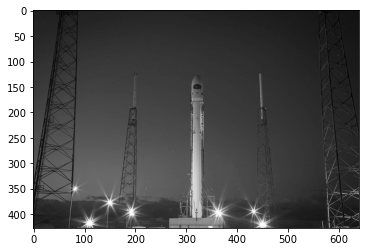

(427, 640)


In [160]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
import skimage.io as io

# get image
image = data.rocket()
print(image.shape)

# rgb -> gray and plot image
coffee = rgb2gray(image)
original_image = coffee
plt.imshow(coffee, cmap='gray')
plt.show()
print(coffee.shape)

In [155]:
def padding(image):
    """
    Функция паддит (дополняет) исходное изображение нулями по краям
    Args:
      image - исходное изображение (дву- трехмерная матрица)
    Returned:
      padded_image - новая матрица, исходное изображение дополненное нулями по краям
    """
    return np.pad(image, pad_width=1, mode='constant', constant_values=0)


def convolve(image, kernel):
    """
    Функция двумерной свертки
    Args:
      image - изображение (дву- трехмерная матрица)
      kernel - ядро свертки
    Returned:
      convolved_image - новая матрица, результат свертки
    """
    n1, n2 = image.shape
    convolved_image = np.zeros((n1 - 2, n2 - 2))
    for i in range(n1-2):
        for j in range(n2-2):
            convolved_image[i,j] += sum(sum(image[i:i+3,j:j+3]*kernel))
    return convolved_image

In [156]:
def grad_sum(image):
    """
    Функция построения матрицы сумм по алгоритму пути наименьшего сопротивления
    Args:
      image - изображение (дву- трехмерная матрица)
    Returned:
      sum_array - новая матрица с суммами
    """
    n = image.shape[0]
    n1 = image.shape[1]
    sum_array = np.zeros(n)
    sum_array[0] = list(image[0,:]).index(min(image[0,:]))
    for i in range(1, n):
        if sum_array[i-1] == 0:
            sum_array[i] = list(image[i,:]).index(min(image[i,int(sum_array[i-1])], image[i,int(sum_array[i-1]+1)]))
        elif sum_array[i-1] == n1-1:
            sum_array[i] = list(image[i,:]).index(min(image[i,int(sum_array[i-1]-1)], image[i,int(sum_array[i-1])]))
        else:
            sum_array[i] = list(image[i,:]).index(min(image[i,int(sum_array[i-1]-1)], image[i,int(sum_array[i-1])], image[i,int(sum_array[i-1]+1)]))
    return sum_array
        

In [157]:
def delete(image, sum_array):
    """
    Функция удаления маловажных пикселей (с наименьшей суммой)
    Args:
      image - исходное изображение (дву- трехмерная матрица)
      sum_array - матрица сумм
    Returned:
      new_image - новая изображение с удаленными пикселями
    """
    n1, n2 = image.shape
    n2 -= 1
    new_image = np.zeros((n1, n2))
    for i in range(n1):
        y = list(image[i,:])
        y.pop(int(sum_array[i]))
        new_image[i,:] = y
    return new_image

In [158]:
# Ядро для свертки, для выделения границ объектов
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

На сколько пикселей уменьшить изображение?
70
Удалено 70 пикселей
Новый размер картинки: (427, 570)


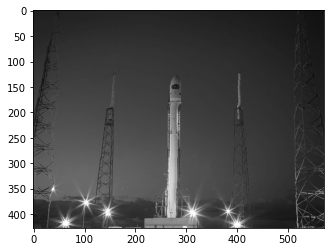

Оригинал: (427, 640)


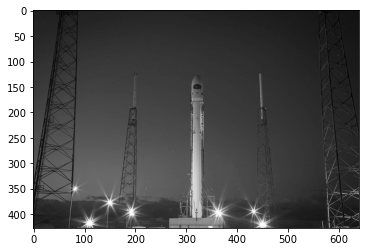

In [159]:
print('На сколько пикселей уменьшить изображение?')
n = int(input())

for i in range(n):
    padded_image = padding(coffee)
    convolved_image = convolve(padded_image, edge_detection_kernel)
    sum_array = grad_sum(convolved_image)
    coffee = delete(coffee, sum_array)
    
print(f'Удалено {n} пикселей\nНовый размер картинки: {np.shape(coffee)}')
plt.imshow(coffee, cmap='gray')
plt.show()
print(f'Оригинал: {np.shape(original_image)}')
plt.imshow(original_image, cmap='gray')
plt.show()